# 采用Keras构建lstm并进行测试

## 1. 导入库，尝试不导入tensorflow

In [5]:
import keras
#尝试是否可以不 import tensorflow
from keras.models import Sequential
from keras.layers import Activation, Dense, LSTM
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

## 2. 构建模型

采用一层LSTM+一层全连接层输出。为什么采用全连接层？

In [17]:
model = Sequential([
    LSTM(16,input_shape = (9,1),activation='relu'),
    Dense(1)
])

编译模型，采用均方差作为损失函数

In [26]:
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.01),
              metrics=[keras.metrics.RootMeanSquaredError()])

查看模型概况

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


## 3. 模型测试
### 3.1 线性序列数据
#### 3.1.1 数据处理
给出9个数，预测第10个，给出80个训练样本。  
采用random方法shuffle打乱数组。  
keras lstm输入的维度为（samples,steps,features），对应于这个问题为（80,9,1)  
输出（80,1,1）

x1 (80, 10)
feature (80, 9, 1)
label (80, 1)


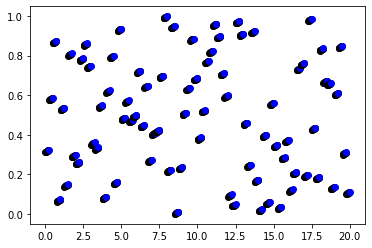

In [34]:
def MaxMinNormalization(x):
    """[0,1] normaliaztion"""
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x


import matplotlib.pyplot as plt
Tx = 10
steps = 800
x = np.linspace(0,20,steps+1)
dx = x[1]-x[0]
y=3*x+1
y = MaxMinNormalization(y)
Nseg = int((len(x)-1)/Tx)
y1 = y[:steps]
# y2 = y[1:steps+1]
x1 = x[1:steps+1]
x1 = x1.reshape(Nseg,Tx)

y1 = y1.reshape(Nseg,Tx)
# y2 = y2.reshape(Nseg,Tx)
seed=100
np.random.seed(seed)
y1 = np.random.permutation(y1)
feature = y1[:,:-1]
label = y1[:,-1]
# label.reshape(Nseg,1)

# feature= feature.reshape(1,Nseg,Tx-1)
# label = label.reshape(1,Nseg,1)
feature= feature.reshape(Nseg,1,Tx-1)
label = label.reshape(Nseg,1,1)
# y2 = y2.reshape(1,Nseg,Tx)

for i in range(feature.shape[0]):
    plt.scatter(x1[i,0:feature.shape[2]],feature[i,0,:],color = 'k')
    plt.scatter(x1[i,-1],label[i,0,:],color = 'b')

feature= feature.reshape(Nseg,Tx-1,1)
label = label.reshape(Nseg,1)
print('x1',x1.shape)
print('feature',feature.shape)
print('label',label.shape)

### 3.1.2. 训练模型
迭代200次，默认输出每个epoch的损失函数

In [29]:
model.fit(
   feature, label, 
   epochs = 200
)

Epoch 1/200
80/80 [==============================] - 1s 9ms/step - loss: 0.2663 - root_mean_squared_error: 0.5161
Epoch 2/200
80/80 [==============================] - 0s 162us/step - loss: 0.1978 - root_mean_squared_error: 0.4448
Epoch 3/200
80/80 [==============================] - 0s 150us/step - loss: 0.1306 - root_mean_squared_error: 0.3613
Epoch 4/200
80/80 [==============================] - 0s 199us/step - loss: 0.0600 - root_mean_squared_error: 0.2450
Epoch 5/200
80/80 [==============================] - 0s 175us/step - loss: 0.0164 - root_mean_squared_error: 0.1282
Epoch 6/200
80/80 [==============================] - 0s 187us/step - loss: 0.0387 - root_mean_squared_error: 0.1968
Epoch 7/200
80/80 [==============================] - 0s 150us/step - loss: 0.0178 - root_mean_squared_error: 0.1334
Epoch 8/200
80/80 [==============================] - 0s 199us/step - loss: 0.0091 - root_mean_squared_error: 0.0953
Epoch 9/200
80/80 [==============================] - 0s 187us/step - loss:

80/80 [==============================] - 0s 274us/step - loss: 1.2104e-05 - root_mean_squared_error: 0.0035
Epoch 69/200
80/80 [==============================] - 0s 262us/step - loss: 1.1931e-05 - root_mean_squared_error: 0.0035
Epoch 70/200
80/80 [==============================] - 0s 274us/step - loss: 1.1577e-05 - root_mean_squared_error: 0.0034
Epoch 71/200
80/80 [==============================] - 0s 287us/step - loss: 1.1376e-05 - root_mean_squared_error: 0.0034
Epoch 72/200
80/80 [==============================] - 0s 274us/step - loss: 1.1124e-05 - root_mean_squared_error: 0.0033
Epoch 73/200
80/80 [==============================] - 0s 274us/step - loss: 1.0870e-05 - root_mean_squared_error: 0.0033
Epoch 74/200
80/80 [==============================] - 0s 274us/step - loss: 1.0787e-05 - root_mean_squared_error: 0.0033
Epoch 75/200
80/80 [==============================] - 0s 274us/step - loss: 1.0519e-05 - root_mean_squared_error: 0.0032
Epoch 76/200
80/80 [=========================

80/80 [==============================] - 0s 287us/step - loss: 3.6222e-06 - root_mean_squared_error: 0.0019
Epoch 136/200
80/80 [==============================] - 0s 274us/step - loss: 3.6835e-06 - root_mean_squared_error: 0.0019
Epoch 137/200
80/80 [==============================] - 0s 287us/step - loss: 3.5539e-06 - root_mean_squared_error: 0.0019
Epoch 138/200
80/80 [==============================] - 0s 262us/step - loss: 3.5261e-06 - root_mean_squared_error: 0.0019
Epoch 139/200
80/80 [==============================] - 0s 274us/step - loss: 3.4552e-06 - root_mean_squared_error: 0.0019
Epoch 140/200
80/80 [==============================] - 0s 274us/step - loss: 3.5071e-06 - root_mean_squared_error: 0.0019
Epoch 141/200
80/80 [==============================] - 0s 262us/step - loss: 3.4183e-06 - root_mean_squared_error: 0.0018
Epoch 142/200
80/80 [==============================] - 0s 274us/step - loss: 3.3538e-06 - root_mean_squared_error: 0.0018
Epoch 143/200
80/80 [=================

### 3.1.3 对训练集的预测

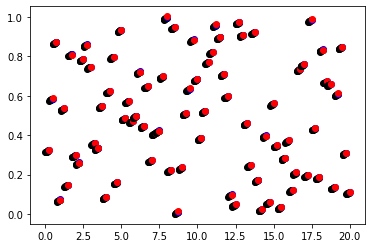

In [35]:
y_pred = model.predict(feature)
for i in range(label.shape[0]):
    plt.scatter(x1[i,:-1],feature[i,:,0],color = 'k')
    plt.scatter(x1[i,-1],label[i,0],color = 'b')
    plt.scatter(x1[i,-1],y_pred[i,0],color = 'r')

### 3.1.4 对测试集的预测
生成测试集

x1_test (80, 10)
feature_test (80, 9, 1)
label_test (80, 1)


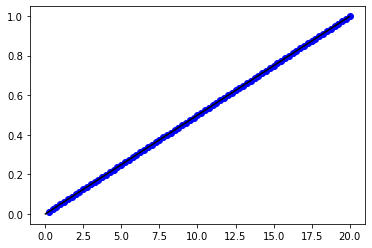

In [39]:
def MaxMinNormalization(x):
    """[0,1] normaliaztion"""
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x

Tx = 10
steps = 800
x = np.linspace(20,40,steps+1)
dx = x[1]-x[0]
y=3*x+1
y = MaxMinNormalization(y)
Nseg = int((len(x)-1)/Tx)
y1 = y[:steps]
# y2 = y[1:steps+1]
x1_test = x[1:steps+1]
x1_test = x1.reshape(Nseg,Tx)
y1 = y1.reshape(Nseg,Tx)
feature_test = y1[:,:-1]
label_test = y1[:,-1]
# label.reshape(Nseg,1)

# feature= feature.reshape(1,Nseg,Tx-1)
# label = label.reshape(1,Nseg,1)
feature_test= feature_test.reshape(Nseg,1,Tx-1)
label_test = label_test.reshape(Nseg,1,1)
# y2 = y2.reshape(1,Nseg,Tx)

for i in range(feature.shape[0]):
    plt.plot(x1_test[i,0:feature_test.shape[2]],feature_test[i,0,:],color = 'k')
    plt.scatter(x1_test[i,-1],label_test[i,0,:],color = 'b')

feature_test= feature_test.reshape(Nseg,Tx-1,1)
label_test = label_test.reshape(Nseg,1)
print('x1_test',x1_test.shape)
print('feature_test',feature_test.shape)
print('label_test',label_test.shape)

对测试集的预测

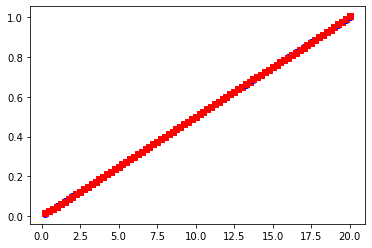

In [41]:
y_pred_test = model.predict(feature_test)
for i in range(label_test.shape[0]):
    #plt.scatter(x1_test[i,:-1],feature_test[i,:,0],color = 'k')
    plt.scatter(x1_test[i,-1],label_test[i,0],color = 'b',marker = 'o')
    plt.scatter(x1_test[i,-1],y_pred_test[i,0],color = 'r',marker = 's')

So far so good

### 3.2 周期性序列测试
#### 3.2.1 三角函数序列数据
这次先不打乱试试看

x_sin (100, 10)
feature_sin (100, 9, 1)
label_sin (100, 1)


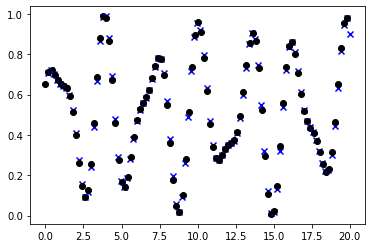

In [186]:
def MaxMinNormalization(x):
    """[0,1] normaliaztion"""
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x


import matplotlib.pyplot as plt
Tx = 10
steps = 1000
x_sin = np.linspace(0,20,steps)
y_sin=np.sin(np.pi*x_sin+2)+2*np.sin(2*x_sin)
y_sin = MaxMinNormalization(y_sin)
Nseg = int(len(x_sin)/Tx)
x_sin = x_sin.reshape(Nseg,Tx)
y_sin = y_sin .reshape(Nseg,1,Tx)

feature_sin = y_sin[:,0,:-1]
label_sin = y_sin[:,0,-1]
feature_sin = feature_sin.reshape(Nseg,Tx-1,1)
label_sin = label_sin.reshape(Nseg,1)
    
print('x_sin',x_sin.shape)
print('feature_sin',feature_sin.shape)
print('label_sin',label_sin.shape)

for i in range(label_sin.shape[0]):
    plt.scatter(x_sin[i,0:feature_sin.shape[2]],feature_sin[i,0,:],color = 'k')
    plt.scatter(x_sin[i,-1],label_sin[i,:],color = 'b',marker = 'x')

#### 3.2.2 构建模型

In [80]:
model_sin=Sequential([
    LSTM(16,input_shape = (9,1),activation='relu'),
    Dense(1)
])

model_sin.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.01),
              metrics=[keras.metrics.RootMeanSquaredError()])

model_sin.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


#### 3.2.3 训练模型

In [81]:
model_sin.fit(
   feature_sin, label_sin, 
   epochs = 500
)

Epoch 1/500
100/100 [==============================] - 0s 2ms/step - loss: 0.2776 - root_mean_squared_error: 0.5269
Epoch 2/500
100/100 [==============================] - 0s 124us/step - loss: 0.0696 - root_mean_squared_error: 0.2638
Epoch 3/500
100/100 [==============================] - 0s 120us/step - loss: 0.0286 - root_mean_squared_error: 0.1692
Epoch 4/500
100/100 [==============================] - 0s 129us/step - loss: 0.0229 - root_mean_squared_error: 0.1512
Epoch 5/500
100/100 [==============================] - 0s 119us/step - loss: 0.0118 - root_mean_squared_error: 0.1085
Epoch 6/500
100/100 [==============================] - 0s 130us/step - loss: 0.0187 - root_mean_squared_error: 0.1367
Epoch 7/500
100/100 [==============================] - 0s 120us/step - loss: 0.0169 - root_mean_squared_error: 0.1299
Epoch 8/500
100/100 [==============================] - 0s 120us/step - loss: 0.0106 - root_mean_squared_error: 0.1028
Epoch 9/500
100/100 [==============================] - 0s 

100/100 [==============================] - 0s 110us/step - loss: 0.0019 - root_mean_squared_error: 0.0433
Epoch 70/500
100/100 [==============================] - 0s 130us/step - loss: 0.0020 - root_mean_squared_error: 0.0442
Epoch 71/500
100/100 [==============================] - 0s 123us/step - loss: 0.0019 - root_mean_squared_error: 0.0435
Epoch 72/500
100/100 [==============================] - 0s 120us/step - loss: 0.0019 - root_mean_squared_error: 0.0435
Epoch 73/500
100/100 [==============================] - 0s 120us/step - loss: 0.0020 - root_mean_squared_error: 0.0446
Epoch 74/500
100/100 [==============================] - 0s 110us/step - loss: 0.0019 - root_mean_squared_error: 0.0433
Epoch 75/500
100/100 [==============================] - 0s 110us/step - loss: 0.0017 - root_mean_squared_error: 0.0416
Epoch 76/500
100/100 [==============================] - 0s 120us/step - loss: 0.0019 - root_mean_squared_error: 0.0435
Epoch 77/500
100/100 [==============================] - 0s 12

100/100 [==============================] - 0s 100us/step - loss: 9.2163e-04 - root_mean_squared_error: 0.0304
Epoch 138/500
100/100 [==============================] - 0s 110us/step - loss: 0.0011 - root_mean_squared_error: 0.0328
Epoch 139/500
100/100 [==============================] - 0s 120us/step - loss: 9.2692e-04 - root_mean_squared_error: 0.0304
Epoch 140/500
100/100 [==============================] - 0s 110us/step - loss: 9.3770e-04 - root_mean_squared_error: 0.0306
Epoch 141/500
100/100 [==============================] - 0s 109us/step - loss: 9.0985e-04 - root_mean_squared_error: 0.0302
Epoch 142/500
100/100 [==============================] - 0s 100us/step - loss: 9.1919e-04 - root_mean_squared_error: 0.0303
Epoch 143/500
100/100 [==============================] - 0s 110us/step - loss: 8.9673e-04 - root_mean_squared_error: 0.0299
Epoch 144/500
100/100 [==============================] - 0s 110us/step - loss: 8.9301e-04 - root_mean_squared_error: 0.0299
Epoch 145/500
100/100 [===

100/100 [==============================] - 0s 110us/step - loss: 5.0509e-04 - root_mean_squared_error: 0.0225
Epoch 204/500
100/100 [==============================] - 0s 130us/step - loss: 4.8257e-04 - root_mean_squared_error: 0.0220
Epoch 205/500
100/100 [==============================] - 0s 110us/step - loss: 4.9466e-04 - root_mean_squared_error: 0.0222
Epoch 206/500
100/100 [==============================] - 0s 110us/step - loss: 4.7359e-04 - root_mean_squared_error: 0.0218
Epoch 207/500
100/100 [==============================] - 0s 110us/step - loss: 4.6005e-04 - root_mean_squared_error: 0.0214
Epoch 208/500
100/100 [==============================] - 0s 130us/step - loss: 5.1236e-04 - root_mean_squared_error: 0.0226
Epoch 209/500
100/100 [==============================] - 0s 120us/step - loss: 5.3723e-04 - root_mean_squared_error: 0.0232
Epoch 210/500
100/100 [==============================] - 0s 120us/step - loss: 5.1205e-04 - root_mean_squared_error: 0.0226
Epoch 211/500
100/100 

100/100 [==============================] - 0s 120us/step - loss: 1.5559e-04 - root_mean_squared_error: 0.0125
Epoch 269/500
100/100 [==============================] - 0s 130us/step - loss: 1.5277e-04 - root_mean_squared_error: 0.0124
Epoch 270/500
100/100 [==============================] - 0s 140us/step - loss: 1.4794e-04 - root_mean_squared_error: 0.0122
Epoch 271/500
100/100 [==============================] - 0s 130us/step - loss: 1.4977e-04 - root_mean_squared_error: 0.0122
Epoch 272/500
100/100 [==============================] - 0s 120us/step - loss: 1.5200e-04 - root_mean_squared_error: 0.0123
Epoch 273/500
100/100 [==============================] - 0s 140us/step - loss: 1.3918e-04 - root_mean_squared_error: 0.0118
Epoch 274/500
100/100 [==============================] - 0s 110us/step - loss: 1.6257e-04 - root_mean_squared_error: 0.0128
Epoch 275/500
100/100 [==============================] - 0s 120us/step - loss: 1.3761e-04 - root_mean_squared_error: 0.0117
Epoch 276/500
100/100 

100/100 [==============================] - 0s 110us/step - loss: 5.8738e-05 - root_mean_squared_error: 0.0077
Epoch 335/500
100/100 [==============================] - 0s 110us/step - loss: 5.9074e-05 - root_mean_squared_error: 0.0077
Epoch 336/500
100/100 [==============================] - 0s 120us/step - loss: 5.8339e-05 - root_mean_squared_error: 0.0076
Epoch 337/500
100/100 [==============================] - 0s 120us/step - loss: 5.7060e-05 - root_mean_squared_error: 0.0076
Epoch 338/500
100/100 [==============================] - 0s 110us/step - loss: 5.8239e-05 - root_mean_squared_error: 0.0076
Epoch 339/500
100/100 [==============================] - 0s 110us/step - loss: 6.2752e-05 - root_mean_squared_error: 0.0079
Epoch 340/500
100/100 [==============================] - 0s 120us/step - loss: 5.3629e-05 - root_mean_squared_error: 0.0073
Epoch 341/500
100/100 [==============================] - 0s 121us/step - loss: 6.3190e-05 - root_mean_squared_error: 0.0079
Epoch 342/500
100/100 

100/100 [==============================] - 0s 120us/step - loss: 2.4641e-05 - root_mean_squared_error: 0.0050
Epoch 401/500
100/100 [==============================] - 0s 119us/step - loss: 2.7234e-05 - root_mean_squared_error: 0.0052
Epoch 402/500
100/100 [==============================] - 0s 120us/step - loss: 2.8230e-05 - root_mean_squared_error: 0.0053
Epoch 403/500
100/100 [==============================] - 0s 120us/step - loss: 2.6999e-05 - root_mean_squared_error: 0.0052
Epoch 404/500
100/100 [==============================] - 0s 120us/step - loss: 2.5765e-05 - root_mean_squared_error: 0.0051
Epoch 405/500
100/100 [==============================] - 0s 110us/step - loss: 2.5872e-05 - root_mean_squared_error: 0.0051
Epoch 406/500
100/100 [==============================] - 0s 100us/step - loss: 2.3569e-05 - root_mean_squared_error: 0.0049
Epoch 407/500
100/100 [==============================] - 0s 120us/step - loss: 2.4750e-05 - root_mean_squared_error: 0.0050
Epoch 408/500
100/100 

100/100 [==============================] - 0s 120us/step - loss: 3.4387e-05 - root_mean_squared_error: 0.0059
Epoch 467/500
100/100 [==============================] - 0s 119us/step - loss: 3.1292e-05 - root_mean_squared_error: 0.0056
Epoch 468/500
100/100 [==============================] - 0s 120us/step - loss: 2.8269e-05 - root_mean_squared_error: 0.0053
Epoch 469/500
100/100 [==============================] - 0s 120us/step - loss: 2.5562e-05 - root_mean_squared_error: 0.0051
Epoch 470/500
100/100 [==============================] - 0s 120us/step - loss: 1.9377e-05 - root_mean_squared_error: 0.0044
Epoch 471/500
100/100 [==============================] - 0s 110us/step - loss: 1.7957e-05 - root_mean_squared_error: 0.0042
Epoch 472/500
100/100 [==============================] - 0s 110us/step - loss: 1.7784e-05 - root_mean_squared_error: 0.0042
Epoch 473/500
100/100 [==============================] - 0s 120us/step - loss: 1.8115e-05 - root_mean_squared_error: 0.0043
Epoch 474/500
100/100 

#### 3.2.4 测试训练集

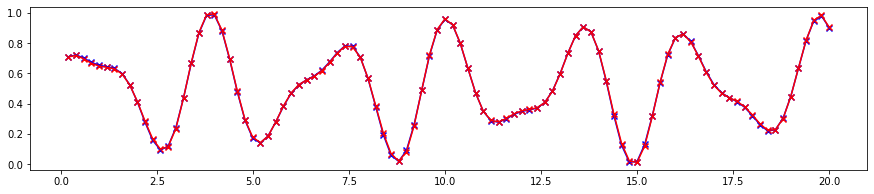

In [187]:
plt.figure(figsize = (15,3))
y_pred_sin = model_sin.predict(feature_sin)
for i in range(label_sin.shape[0]):
    #plt.scatter(x_sin[i,:-1],feature_sin[i,:,0],color = 'k')
    plt.scatter(x_sin[i,-1],label_sin[i,0],color = 'b',marker = 'x')
    plt.scatter(x_sin[i,-1],y_pred_sin[i,0],color = 'r',marker = 'x')
plt.plot(x_sin[:,-1],label_sin[:,0],color = 'b')
plt.plot(x_sin[:,-1],y_pred_sin[:,0],color = 'r')

#### 3.2.5 测试测试集

x_sin (20, 10)
feature_sin (20, 9, 1)
label_sin (20, 1)


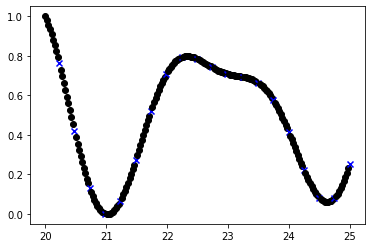

In [188]:
Tx = 10
steps = 200
x_sin2 = np.linspace(20,25,steps)
y_sin2=np.sin(np.pi*x_sin2+2)+2*np.sin(2*x_sin2)
y_sin2 = MaxMinNormalization(y_sin2)
Nseg = int(len(x_sin2)/Tx)
x_sin2 = x_sin2.reshape(Nseg,Tx)
y_sin2 = y_sin2.reshape(Nseg,1,Tx)

feature_sin2 = y_sin2[:,0,:-1]
label_sin2 = y_sin2[:,0,-1]
feature_sin2 = feature_sin2.reshape(Nseg,Tx-1,1)
label_sin2 = label_sin2.reshape(Nseg,1)
    
print('x_sin',x_sin2.shape)
print('feature_sin',feature_sin2.shape)
print('label_sin',label_sin2.shape)

for i in range(label_sin2.shape[0]):
    plt.scatter(x_sin2[i,0:feature_sin2.shape[1]],feature_sin2[i,:,0],color = 'k')
    plt.scatter(x_sin2[i,-1],label_sin2[i,:],color = 'b',marker = 'x')

紧张刺激的时刻到了

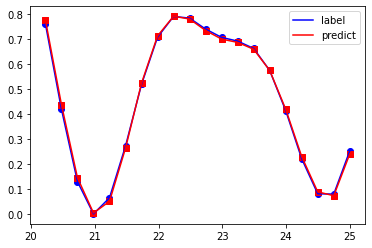

In [189]:
y_pred_sin2 =model_sin.predict(feature_sin2)
for i in range(label_sin2.shape[0]):
    #plt.scatter(x_sin2[i,:-1],feature_sin2[i,:,0],color = 'k')
    plt.scatter(x_sin2[i,-1],label_sin2[i,0],color = 'b',marker = 'o')
    plt.scatter(x_sin2[i,-1],y_pred_sin2[i,0],color = 'r',marker = 's')
plt.plot(x_sin2[:,-1],label_sin2[:,0],color = 'b',label = 'label')
plt.plot(x_sin2[:,-1],y_pred_sin2[:,0],color = 'r',label = 'predict')
plt.legend()

#### 3.2.6 连续采样预测一段序列
会怎样？  
给一段采样输入，这里采用测试集的第一段9个信号作为输入

In [190]:
pred_len = 10
inputs = feature_sin2[0,:,0]
inputs = inputs.reshape(1,feature_sin2.shape[1],1)
print('inputs',inputs.shape)
print(inputs)

inputs (1, 9, 1)
[[[1.        ]
  [0.979677  ]
  [0.95759852]
  [0.93384987]
  [0.90852432]
  [0.88172265]
  [0.85355265]
  [0.82412862]
  [0.79357081]]]


看一下预测

In [191]:
ypred2 = model_sin.predict(inputs)
print(ypred2.shape)
print(ypred2)

(1, 1)
[[0.7773605]]


写采样函数，功能是给定一个预测长度，不断地将预测输出作为下一个输入

In [123]:
def add2seq(seq,x):
    seq= np.append(seq, x)
    seq = np.delete(seq,0)
    seq = seq.reshape(1,seq.shape[0],1)
    return seq

def sample(model, inputs, pred_len):
    outputs = []
    x = model.predict(inputs)
    outputs.append(x)
    for i in range(pred_len):
        inputs = add2seq(inputs,x[0,0])
        x = model.predict(inputs)
        outputs.append(x)
    return np.array(outputs)

预测后续20个时间步的信息

dx 0.02512562814070307
(20, 10)


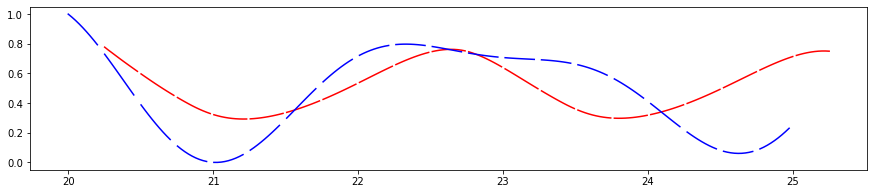

In [198]:
n = 20
nstep = n*Tx
dx = x_sin2[0,1]-x_sin2[0,0]
print('dx',dx)
outputs_sin = sample(model_sin, inputs,nstep-1)
outputs_sin=outputs_sin.reshape(n,Tx)
print(outputs_sin.shape)
plt.figure(figsize = (15,3))
for i in range(outputs_sin.shape[0]):
    plt.plot(x_sin2[i,0:feature_sin2.shape[1]],feature_sin2[i,:,0],color = 'b',label = 'label')
    plt.plot(x_sin2[i,0:outputs_sin.shape[1]]+dx*(Tx),outputs_sin[i,:],color = 'r',label = 'predict')

过一段时间就不准了呀，可能是学习的时间不够长，毕竟此时预测与学习时长达到1:1

#### 3.2.7 模型调参测试
简单粗暴将总时间扩大，顺便增加一下神经元数量

In [173]:
Tx = 20
steps = 2000
x_sin = np.linspace(0,200,steps)
y_sin=np.sin(np.pi*x_sin+2)+2*np.sin(2*x_sin)
y_sin = MaxMinNormalization(y_sin)
Nseg = int(len(x_sin)/Tx)
x_sin = x_sin.reshape(Nseg,Tx)
y_sin = y_sin .reshape(Nseg,1,Tx)

feature_sin = y_sin[:,0,:-1]
label_sin = y_sin[:,0,-1]
feature_sin = feature_sin.reshape(Nseg,Tx-1,1)
label_sin = label_sin.reshape(Nseg,1)
    
print('x_sin',x_sin.shape)
print('feature_sin',feature_sin.shape)
print('label_sin',label_sin.shape)
  

x_sin (100, 20)
feature_sin (100, 19, 1)
label_sin (100, 1)


In [174]:
model_new=Sequential([
    LSTM(32,input_shape = (19,1),activation='relu'),
    Dense(1)
])

model_new.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.01),
              metrics=[keras.metrics.RootMeanSquaredError()])

model_new.summary()

model_new.fit(
   feature_sin, label_sin, 
   epochs = 500
)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
100/100 [==============================] - 0s 3ms/step - loss: 0.2271 - root_mean_squared_error: 0.4765
Epoch 2/500
100/100 [==============================] - 0s 209us/step - loss: 0.0537 - root_mean_squared_error: 0.2317
Epoch 3/500
100/100 [==============================] - 0s 229us/step - loss: 0.0283 - root_mean_squared_error: 0.1681
Epoch 4/500
100/100 [==============================] - 0s 219us/step - loss: 0.0244 - root_mean_squared_error: 0.1561
Epoch 5/500
100/100 [======================

100/100 [==============================] - 0s 219us/step - loss: 1.5371e-04 - root_mean_squared_error: 0.0124
Epoch 64/500
100/100 [==============================] - 0s 239us/step - loss: 1.3787e-04 - root_mean_squared_error: 0.0117
Epoch 65/500
100/100 [==============================] - 0s 211us/step - loss: 1.3028e-04 - root_mean_squared_error: 0.0114
Epoch 66/500
100/100 [==============================] - 0s 209us/step - loss: 1.3179e-04 - root_mean_squared_error: 0.0115
Epoch 67/500
100/100 [==============================] - 0s 199us/step - loss: 1.2047e-04 - root_mean_squared_error: 0.0110
Epoch 68/500
100/100 [==============================] - 0s 209us/step - loss: 1.8272e-04 - root_mean_squared_error: 0.0135
Epoch 69/500
100/100 [==============================] - 0s 209us/step - loss: 1.7744e-04 - root_mean_squared_error: 0.0133
Epoch 70/500
100/100 [==============================] - 0s 226us/step - loss: 1.6181e-04 - root_mean_squared_error: 0.0127
Epoch 71/500
100/100 [=======

100/100 [==============================] - 0s 249us/step - loss: 3.3962e-04 - root_mean_squared_error: 0.0184
Epoch 130/500
100/100 [==============================] - 0s 242us/step - loss: 2.9678e-04 - root_mean_squared_error: 0.0172
Epoch 131/500
100/100 [==============================] - 0s 232us/step - loss: 2.0658e-04 - root_mean_squared_error: 0.0144
Epoch 132/500
100/100 [==============================] - 0s 237us/step - loss: 2.6299e-04 - root_mean_squared_error: 0.0162
Epoch 133/500
100/100 [==============================] - 0s 229us/step - loss: 1.1982e-04 - root_mean_squared_error: 0.0109
Epoch 134/500
100/100 [==============================] - 0s 239us/step - loss: 1.1061e-04 - root_mean_squared_error: 0.0105
Epoch 135/500
100/100 [==============================] - 0s 239us/step - loss: 9.7046e-05 - root_mean_squared_error: 0.0099
Epoch 136/500
100/100 [==============================] - 0s 229us/step - loss: 1.2923e-04 - root_mean_squared_error: 0.0114
Epoch 137/500
100/100 

100/100 [==============================] - 0s 219us/step - loss: 9.4285e-05 - root_mean_squared_error: 0.0097
Epoch 196/500
100/100 [==============================] - 0s 219us/step - loss: 9.8783e-05 - root_mean_squared_error: 0.0099
Epoch 197/500
100/100 [==============================] - 0s 219us/step - loss: 1.0617e-04 - root_mean_squared_error: 0.0103
Epoch 198/500
100/100 [==============================] - 0s 219us/step - loss: 6.4403e-05 - root_mean_squared_error: 0.0080
Epoch 199/500
100/100 [==============================] - 0s 239us/step - loss: 6.7198e-05 - root_mean_squared_error: 0.0082
Epoch 200/500
100/100 [==============================] - 0s 229us/step - loss: 6.7304e-05 - root_mean_squared_error: 0.0082
Epoch 201/500
100/100 [==============================] - 0s 219us/step - loss: 6.5635e-05 - root_mean_squared_error: 0.0081
Epoch 202/500
100/100 [==============================] - 0s 219us/step - loss: 6.5591e-05 - root_mean_squared_error: 0.0081
Epoch 203/500
100/100 

100/100 [==============================] - 0s 219us/step - loss: 5.4223e-05 - root_mean_squared_error: 0.0074
Epoch 262/500
100/100 [==============================] - 0s 279us/step - loss: 5.6211e-05 - root_mean_squared_error: 0.0075
Epoch 263/500
100/100 [==============================] - 0s 219us/step - loss: 1.0666e-04 - root_mean_squared_error: 0.0103
Epoch 264/500
100/100 [==============================] - 0s 219us/step - loss: 9.5097e-05 - root_mean_squared_error: 0.0098
Epoch 265/500
100/100 [==============================] - 0s 209us/step - loss: 8.9138e-05 - root_mean_squared_error: 0.0094
Epoch 266/500
100/100 [==============================] - 0s 213us/step - loss: 6.7065e-05 - root_mean_squared_error: 0.0082
Epoch 267/500
100/100 [==============================] - 0s 229us/step - loss: 5.9058e-05 - root_mean_squared_error: 0.0077
Epoch 268/500
100/100 [==============================] - 0s 219us/step - loss: 6.2207e-05 - root_mean_squared_error: 0.0079
Epoch 269/500
100/100 

100/100 [==============================] - 0s 219us/step - loss: 5.4454e-05 - root_mean_squared_error: 0.0074
Epoch 328/500
100/100 [==============================] - 0s 239us/step - loss: 6.7955e-05 - root_mean_squared_error: 0.0082
Epoch 329/500
100/100 [==============================] - 0s 229us/step - loss: 8.1771e-05 - root_mean_squared_error: 0.0090
Epoch 330/500
100/100 [==============================] - 0s 229us/step - loss: 8.1406e-05 - root_mean_squared_error: 0.0090
Epoch 331/500
100/100 [==============================] - 0s 209us/step - loss: 4.8161e-05 - root_mean_squared_error: 0.0069
Epoch 332/500
100/100 [==============================] - 0s 219us/step - loss: 1.0458e-04 - root_mean_squared_error: 0.0102
Epoch 333/500
100/100 [==============================] - 0s 229us/step - loss: 8.1474e-05 - root_mean_squared_error: 0.0090
Epoch 334/500
100/100 [==============================] - 0s 219us/step - loss: 6.4191e-05 - root_mean_squared_error: 0.0080
Epoch 335/500
100/100 

100/100 [==============================] - 0s 219us/step - loss: 4.5920e-05 - root_mean_squared_error: 0.0068
Epoch 394/500
100/100 [==============================] - 0s 219us/step - loss: 4.3909e-05 - root_mean_squared_error: 0.0066
Epoch 395/500
100/100 [==============================] - 0s 239us/step - loss: 3.6002e-05 - root_mean_squared_error: 0.0060
Epoch 396/500
100/100 [==============================] - 0s 219us/step - loss: 5.2694e-05 - root_mean_squared_error: 0.0073
Epoch 397/500
100/100 [==============================] - 0s 219us/step - loss: 6.8309e-05 - root_mean_squared_error: 0.0083
Epoch 398/500
100/100 [==============================] - 0s 229us/step - loss: 4.6011e-05 - root_mean_squared_error: 0.0068
Epoch 399/500
100/100 [==============================] - 0s 219us/step - loss: 4.5114e-05 - root_mean_squared_error: 0.0067
Epoch 400/500
100/100 [==============================] - 0s 219us/step - loss: 6.9498e-05 - root_mean_squared_error: 0.0083
Epoch 401/500
100/100 

100/100 [==============================] - 0s 209us/step - loss: 9.2029e-05 - root_mean_squared_error: 0.0096
Epoch 460/500
100/100 [==============================] - 0s 219us/step - loss: 7.4132e-05 - root_mean_squared_error: 0.0086
Epoch 461/500
100/100 [==============================] - 0s 219us/step - loss: 2.8786e-05 - root_mean_squared_error: 0.0054
Epoch 462/500
100/100 [==============================] - 0s 219us/step - loss: 5.0601e-05 - root_mean_squared_error: 0.0071
Epoch 463/500
100/100 [==============================] - 0s 219us/step - loss: 3.4356e-05 - root_mean_squared_error: 0.0059
Epoch 464/500
100/100 [==============================] - 0s 219us/step - loss: 2.0131e-05 - root_mean_squared_error: 0.0045
Epoch 465/500
100/100 [==============================] - 0s 219us/step - loss: 2.2260e-05 - root_mean_squared_error: 0.0047
Epoch 466/500
100/100 [==============================] - 0s 209us/step - loss: 2.5235e-05 - root_mean_squared_error: 0.0050
Epoch 467/500
100/100 

训练集测试

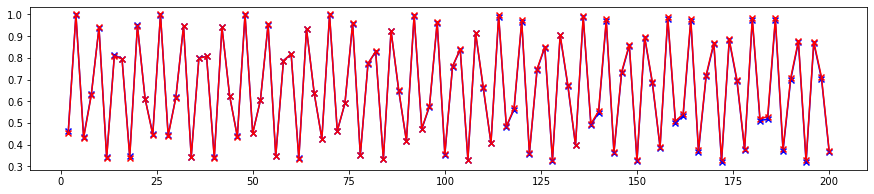

In [175]:
plt.figure(figsize = (15,3))
y_pred_new = model_new.predict(feature_sin)
for i in range(label_sin.shape[0]):
    #plt.scatter(x_sin[i,:-1],feature_sin[i,:,0],color = 'k')
    plt.scatter(x_sin[i,-1],label_sin[i,0],color = 'b',marker = 'x')
    plt.scatter(x_sin[i,-1],y_pred_new[i,0],color = 'r',marker = 'x')
plt.plot(x_sin[:,-1],label_sin[:,0],color = 'b')
plt.plot(x_sin[:,-1],y_pred_new[:,0],color = 'r')

测试集测试

x_sin (50, 20)
feature_sin (50, 19, 1)
label_sin (50, 1)


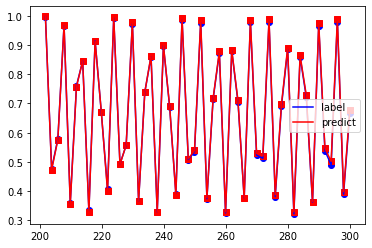

In [176]:
Tx = 20
steps = 1000
x_sin2 = np.linspace(200,300,steps)
y_sin2=np.sin(np.pi*x_sin2+2)+2*np.sin(2*x_sin2)
y_sin2 = MaxMinNormalization(y_sin2)
Nseg = int(len(x_sin2)/Tx)
x_sin2 = x_sin2.reshape(Nseg,Tx)
y_sin2 = y_sin2.reshape(Nseg,1,Tx)

feature_sin2 = y_sin2[:,0,:-1]
label_sin2 = y_sin2[:,0,-1]
feature_sin2 = feature_sin2.reshape(Nseg,Tx-1,1)
label_sin2 = label_sin2.reshape(Nseg,1)
    
print('x_sin',x_sin2.shape)
print('feature_sin',feature_sin2.shape)
print('label_sin',label_sin2.shape)
    
y_pred_sin2 =model_new.predict(feature_sin2)
for i in range(label_sin2.shape[0]):
    #plt.scatter(x_sin2[i,:-1],feature_sin2[i,:,0],color = 'k')
    plt.scatter(x_sin2[i,-1],label_sin2[i,0],color = 'b',marker = 'o')
    plt.scatter(x_sin2[i,-1],y_pred_sin2[i,0],color = 'r',marker = 's')
plt.plot(x_sin2[:,-1],label_sin2[:,0],color = 'b',label = 'label')
plt.plot(x_sin2[:,-1],y_pred_sin2[:,0],color = 'r',label = 'predict')
plt.legend()

再来采样测试

inputs (1, 19, 1)
inputs (1, 19, 1)
[[0.99836475]]
dx 0.10010010010009296
(20, 20)


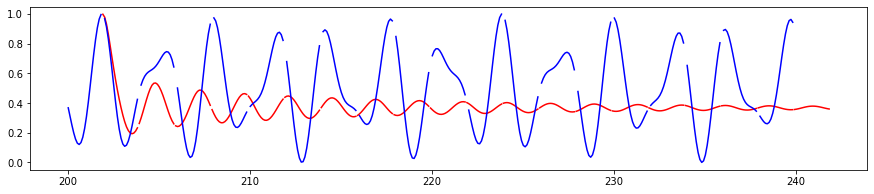

In [184]:
pred_len = 10
inputs = feature_sin2[0,:,0]
inputs = inputs.reshape(1,feature_sin2.shape[1],1)
y1 = model_new.predict(inputs)
print('inputs',inputs.shape)
print('inputs',inputs.shape)
print(y1)

dx = x_sin2[0,1]-x_sin2[0,0]
print('dx',dx)

n = 20
nstep = n*Tx
outputs_sin = sample(model_new, inputs,nstep-1)
outputs_sin=outputs_sin.reshape(n,Tx)
print(outputs_sin.shape)
plt.figure(figsize = (15,3))
for i in range(outputs_sin.shape[0]):
    plt.plot(x_sin2[i,0:feature_sin2.shape[1]],feature_sin2[i,:,0],color = 'b',label = 'label')
    plt.plot(x_sin2[i,0:outputs_sin.shape[1]]+19*dx,outputs_sin[i,:],color = 'r',label = 'predict')

久了之后就不准了，逐渐衰减（遗忘？）  
但就设计的功能而言，预测下一个时刻的表现还是可以的。  
可能是因为选取的序列是离散的，下次试试滑动窗口作为训练集。